In [7]:
library(ggplot2)
library(forecast )
library(fpp2)
library(seasonal)

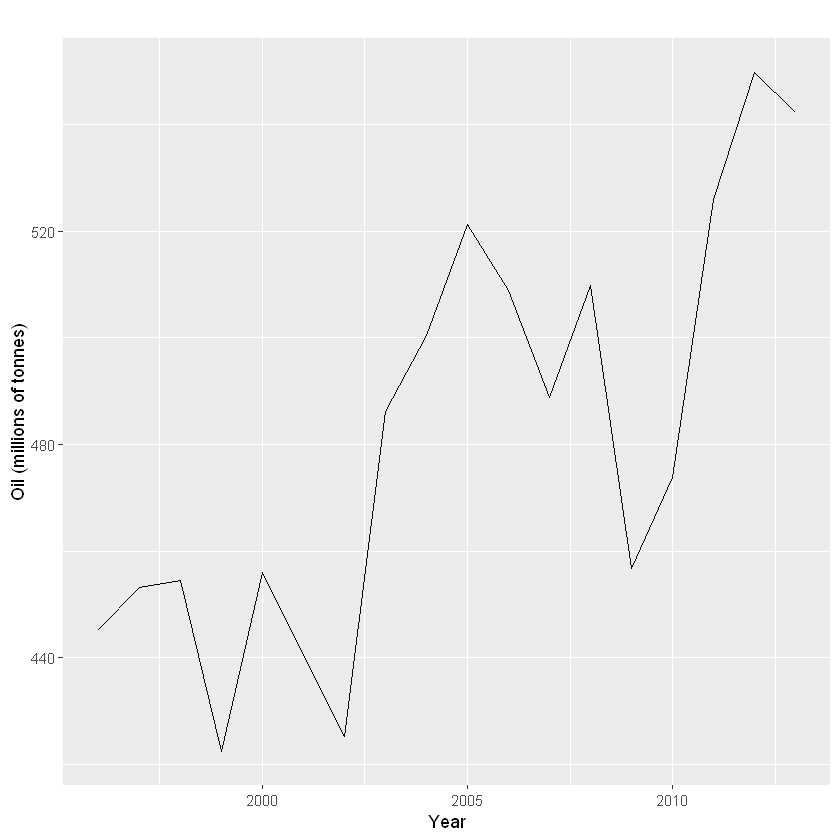

In [8]:
oildata <- window(oil, start=1996)
autoplot(oildata) +
  ylab("Oil (millions of tonnes)") + xlab("Year")

In [9]:
oildata <- window(oil, start=1996)
# Estimate parameters
fc <- ses(oildata, h=5)
# Accuracy of one-step-ahead training errors
round(accuracy(fc),2)
#>               ME  RMSE   MAE MPE MAPE MASE  ACF1
#> Training set 6.4 28.12 22.26 1.1 4.61 0.93 -0.03

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,6.4,28.12,22.26,1.1,4.61,0.93,-0.03


In [11]:
oildata

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

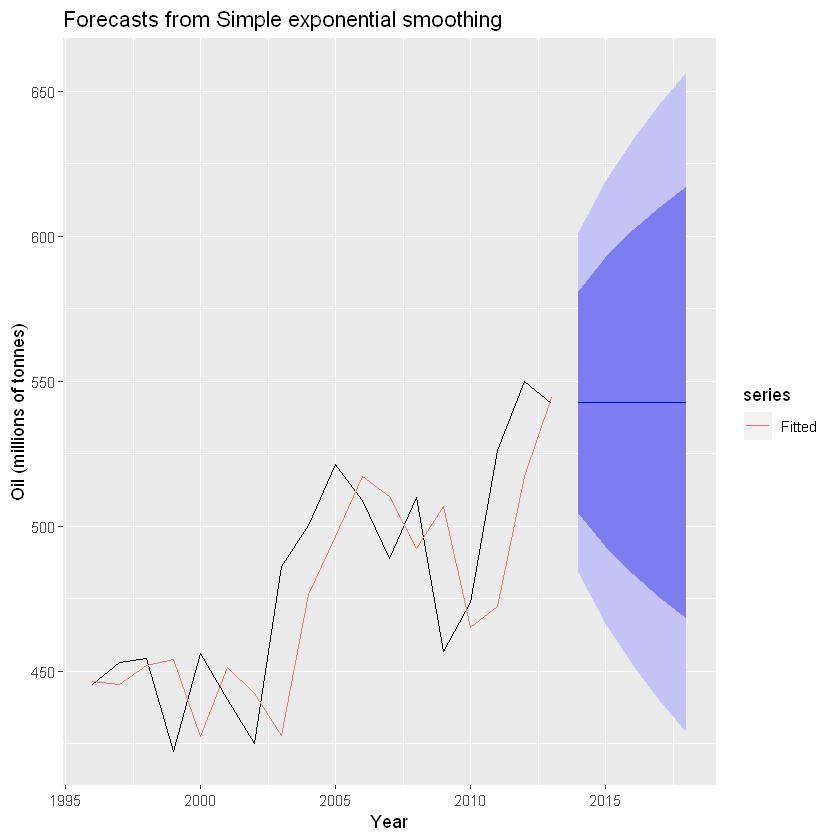

In [12]:
autoplot(fc) +
  autolayer(fitted(fc), series="Fitted") +
  ylab("Oil (millions of tonnes)") + xlab("Year")

In [13]:
air <- window(ausair, start=1990)
fc <- holt(air, h=5)

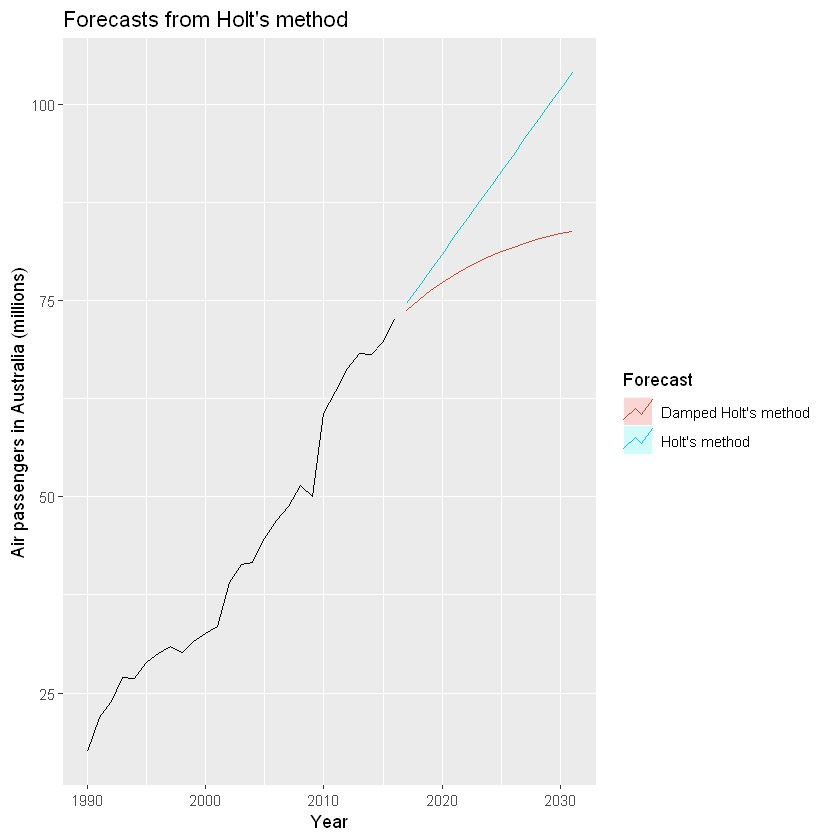

In [14]:
fc <- holt(air, h=15)
fc2 <- holt(air, damped=TRUE, phi = 0.9, h=15)
autoplot(air) +
  autolayer(fc, series="Holt's method", PI=FALSE) +
  autolayer(fc2, series="Damped Holt's method", PI=FALSE) +
  ggtitle("Forecasts from Holt's method") + xlab("Year") +
  ylab("Air passengers in Australia (millions)") +
  guides(colour=guide_legend(title="Forecast"))

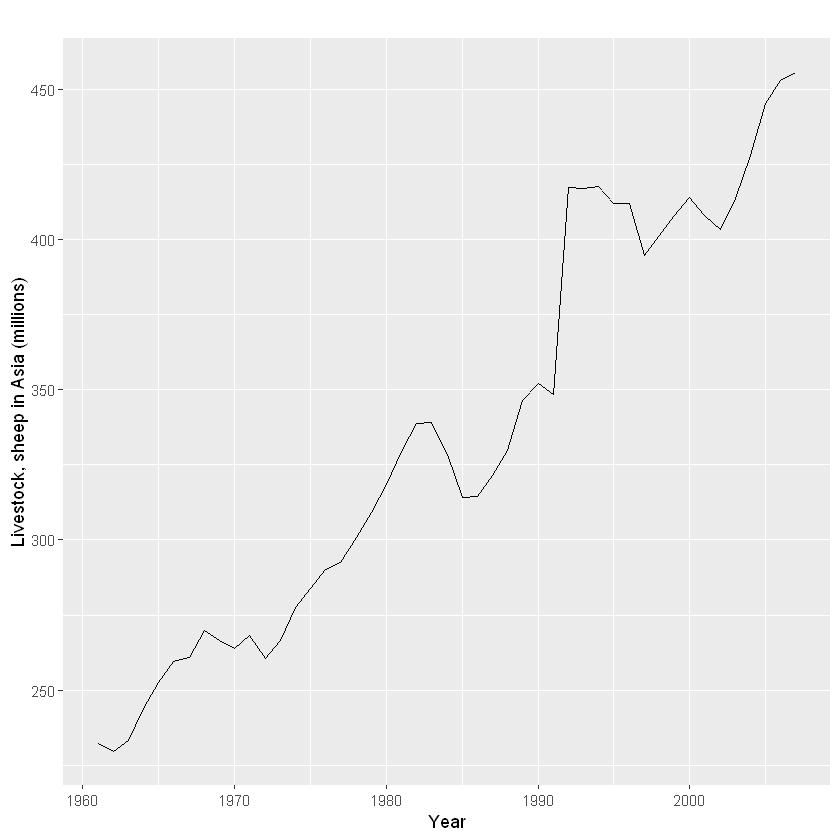

In [15]:
autoplot(livestock) +
  xlab("Year") + ylab("Livestock, sheep in Asia (millions)")

In [16]:
e1 <- tsCV(livestock, ses, h=1)
e2 <- tsCV(livestock, holt, h=1)
e3 <- tsCV(livestock, holt, damped=TRUE, h=1)
# Compare MSE:
mean(e1^2, na.rm=TRUE)
#> [1] 178.3
mean(e2^2, na.rm=TRUE)
#> [1] 173.4
mean(e3^2, na.rm=TRUE)
#> [1] 162.6
# Compare MAE:
mean(abs(e1), na.rm=TRUE)
#> [1] 8.532
mean(abs(e2), na.rm=TRUE)
#> [1] 8.803
mean(abs(e3), na.rm=TRUE)
#> [1] 8.024

[1] 178.2531

[1] 173.365

[1] 162.6274

[1] 8.53246

[1] 8.803058

[1] 8.024192

In [17]:
fc <- holt(livestock, damped=TRUE)
# Estimated parameters:
fc[["model"]]
#> Damped Holt's method 
#> 
#> Call:
#>  holt(y = livestock, damped = TRUE) 
#> 
#>   Smoothing parameters:
#>     alpha = 0.9999 
#>     beta  = 3e-04 
#>     phi   = 0.9798 
#> 
#>   Initial states:
#>     l = 223.35 
#>     b = 6.9046 
#> 
#>   sigma:  12.84
#> 
#>   AIC  AICc   BIC 
#> 427.6 429.7 438.7

Damped Holt's method 

Call:
 holt(y = livestock, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 3e-04 
    phi   = 0.9798 

  Initial states:
    l = 223.35 
    b = 6.9046 

  sigma:  12.8435

     AIC     AICc      BIC 
427.6370 429.7370 438.7379 

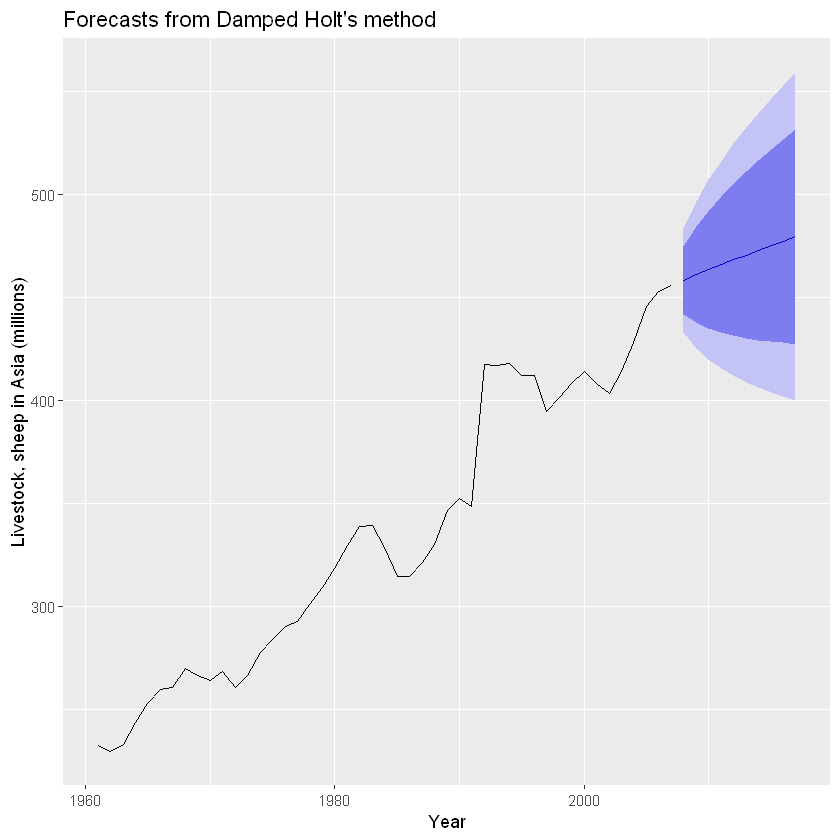

In [18]:
autoplot(fc) +
  xlab("Year") + ylab("Livestock, sheep in Asia (millions)")

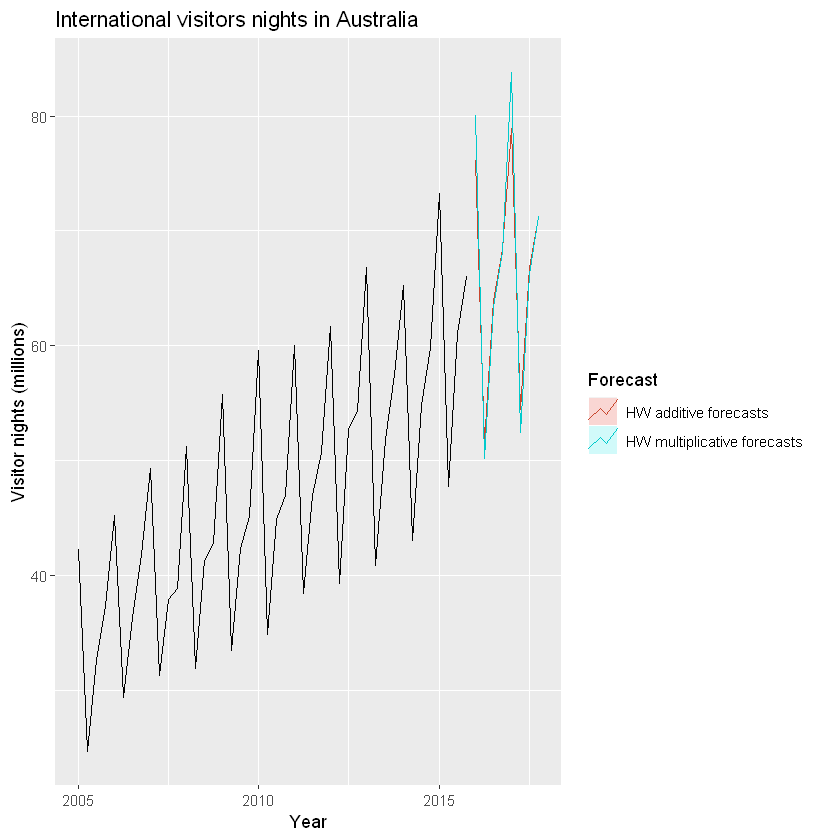

In [19]:
aust <- window(austourists,start=2005)
fit1 <- hw(aust,seasonal="additive")
fit2 <- hw(aust,seasonal="multiplicative")
autoplot(aust) +
  autolayer(fit1, series="HW additive forecasts", PI=FALSE) +
  autolayer(fit2, series="HW multiplicative forecasts",
    PI=FALSE) +
  xlab("Year") +
  ylab("Visitor nights (millions)") +
  ggtitle("International visitors nights in Australia") +
  guides(colour=guide_legend(title="Forecast"))

In [20]:
hw(y, damped=TRUE, seasonal="multiplicative")

ERROR: Error in frequency(x): object 'y' not found


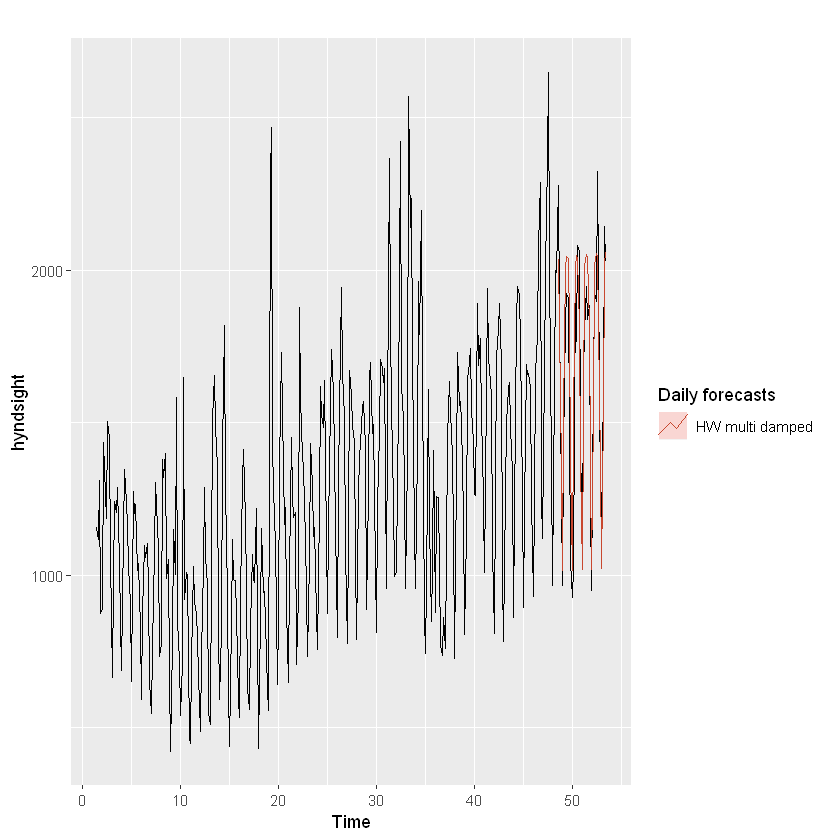

In [21]:
fc <- hw(subset(hyndsight,end=length(hyndsight)-35),
         damped = TRUE, seasonal="multiplicative", h=35)
autoplot(hyndsight) +
  autolayer(fc, series="HW multi damped", PI=FALSE)+
  guides(colour=guide_legend(title="Daily forecasts"))

ETS

error trend season

In [22]:
ets(y, model="ZZZ", damped=NULL, alpha=NULL, beta=NULL,
    gamma=NULL, phi=NULL, lambda=NULL, biasadj=FALSE,
    additive.only=FALSE, restrict=TRUE,
    allow.multiplicative.trend=FALSE)

ERROR: Error in class(y) %in% c("data.frame", "list", "matrix", "mts"): object 'y' not found


In [23]:
aust <- window(austourists, start=2005)
fit <- ets(aust)
summary(fit)
#> ETS(M,A,M) 
#> 
#> Call:
#>  ets(y = aust) 
#> 
#>   Smoothing parameters:
#>     alpha = 0.1908 
#>     beta  = 0.0392 
#>     gamma = 2e-04 
#> 
#>   Initial states:
#>     l = 32.3679 
#>     b = 0.9281 
#>     s = 1.022 0.9628 0.7683 1.247
#> 
#>   sigma:  0.0383
#> 
#>   AIC  AICc   BIC 
#> 224.9 230.2 240.9 
#> 
#> Training set error measures:
#>                   ME  RMSE  MAE     MPE  MAPE   MASE
#> Training set 0.04837 1.671 1.25 -0.1846 2.693 0.4095
#>                ACF1
#> Training set 0.2006

ETS(M,A,M) 

Call:
 ets(y = aust) 

  Smoothing parameters:
    alpha = 0.1908 
    beta  = 0.0392 
    gamma = 2e-04 

  Initial states:
    l = 32.3679 
    b = 0.9281 
    s = 1.0218 0.9628 0.7683 1.2471

  sigma:  0.0383

     AIC     AICc      BIC 
224.8628 230.1569 240.9205 

Training set error measures:
                     ME     RMSE     MAE        MPE     MAPE     MASE      ACF1
Training set 0.04836907 1.670893 1.24954 -0.1845609 2.692849 0.409454 0.2005962


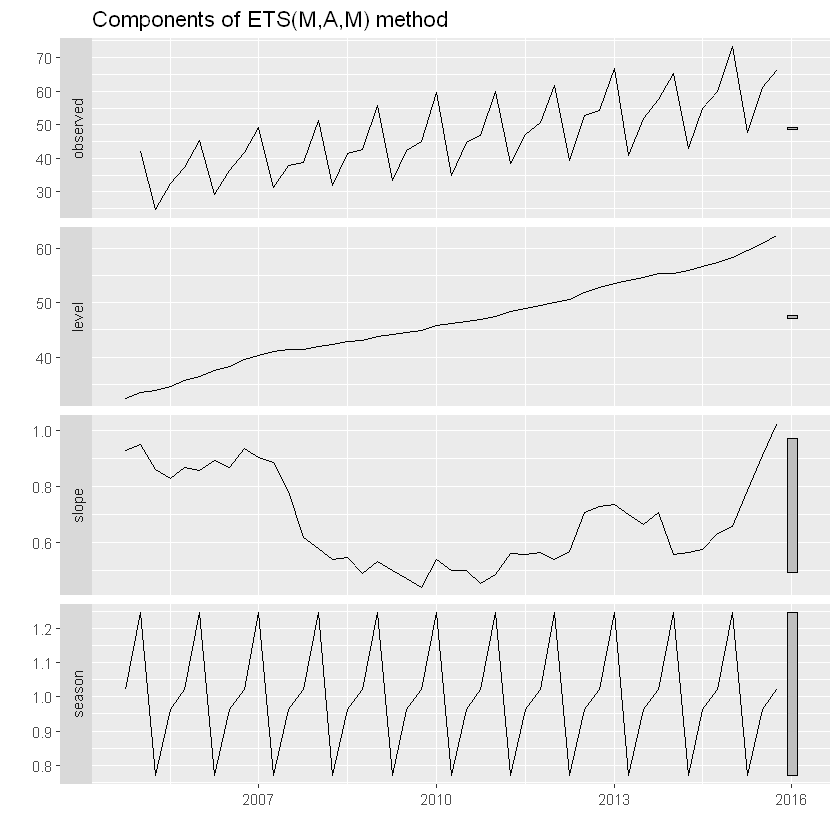

In [24]:
autoplot(fit)

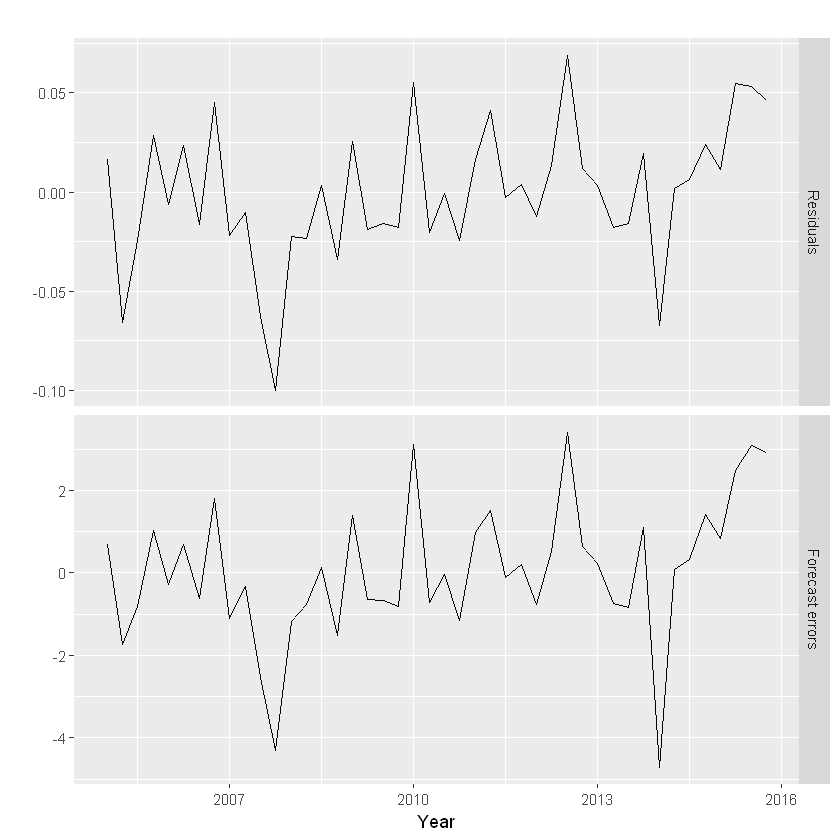

In [25]:
cbind('Residuals' = residuals(fit),
      'Forecast errors' = residuals(fit,type='response')) %>%
  autoplot(facet=TRUE) + xlab("Year") + ylab("")

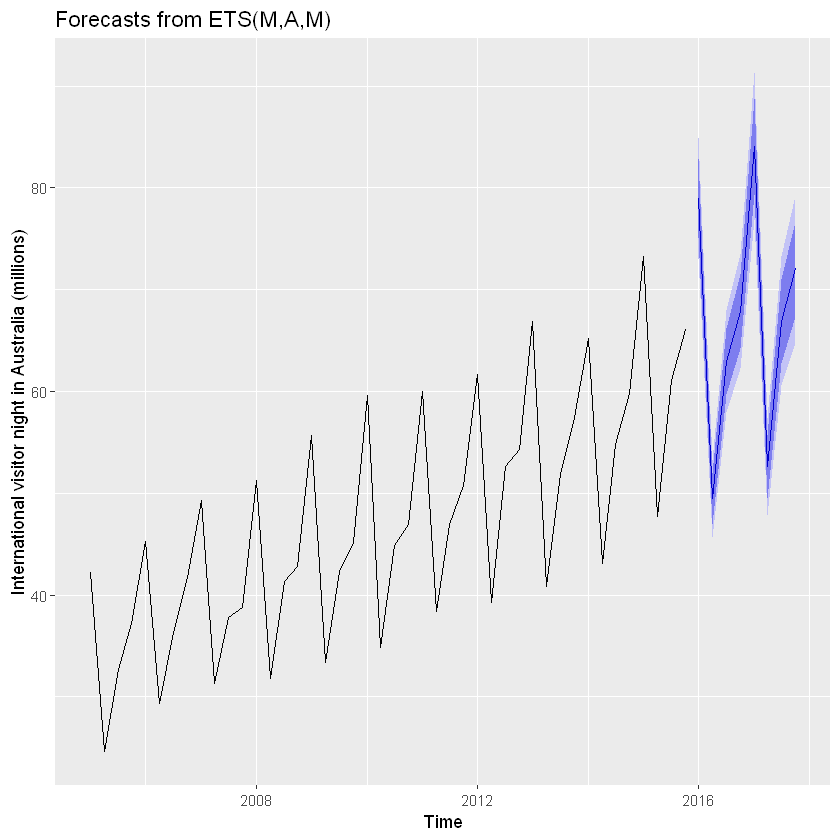

In [26]:
fit %>% forecast(h=8) %>%
  autoplot() +
  ylab("International visitor night in Australia (millions)")

In [28]:
forecast(object, h=ifelse(object$m>1, 2*object$m, 10),
level=c(80,95), fan=FALSE, simulate=FALSE, bootstrap=FALSE,
npaths=5000, PI=TRUE, lambda=object$lambda, biasadj=NULL, ...)

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context
